image-data/P106-Fg002-R-C01-R01-binarized.jpg


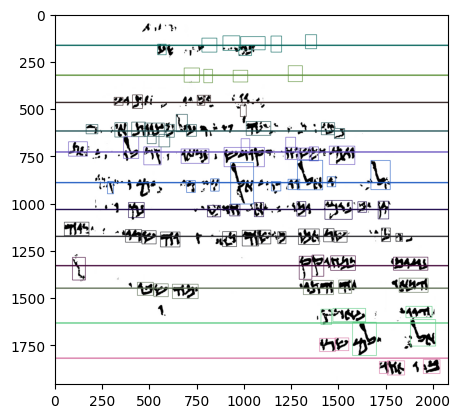

image-data/P123-Fg001-R-C01-R01-binarized.jpg


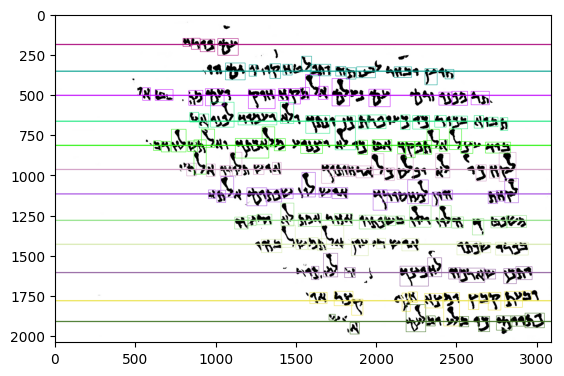

image-data/P123-Fg002-R-C01-R01-binarized.jpg


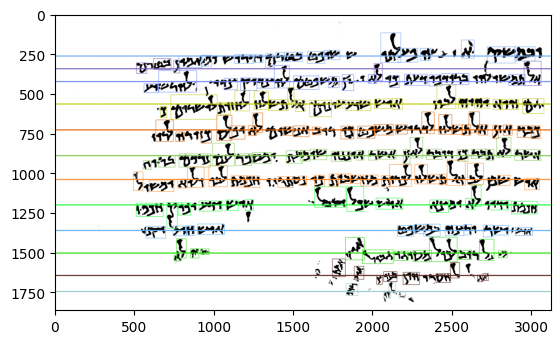

image-data/P166-Fg002-R-C01-R01-binarized.jpg


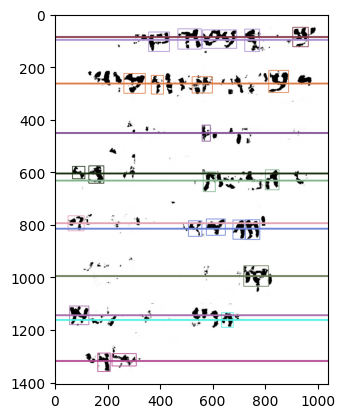

image-data/P166-Fg007-R-C01-R01-binarized.jpg


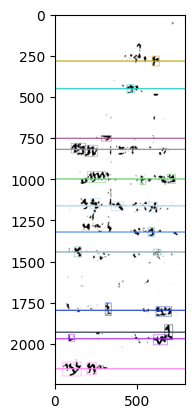

image-data/P168-Fg016-R-C01-R01-binarized.jpg


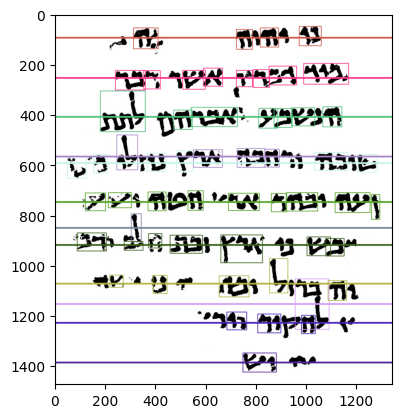

image-data/P172-Fg001-R-C01-R01-binarized.jpg


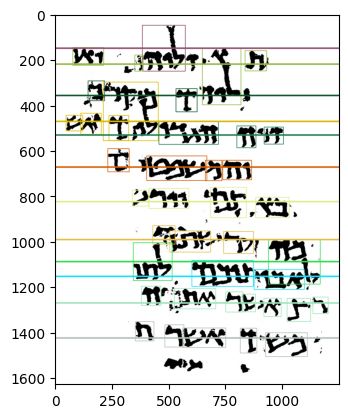

image-data/P21-Fg006-R-C01-R01-binarized.jpg


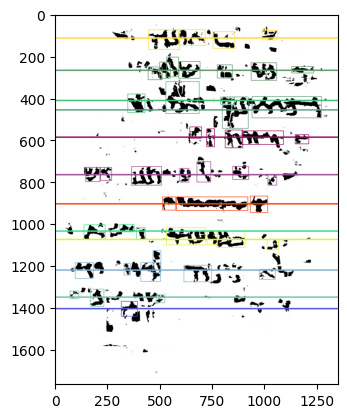

image-data/P22-Fg008-R-C01-R01-binarized.jpg


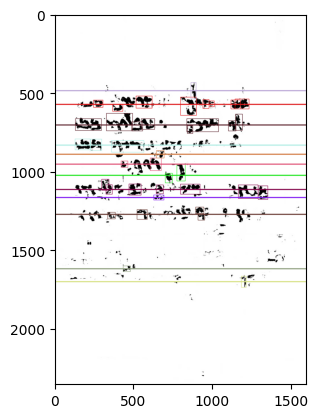

image-data/P342-Fg001-R-C01-R01-binarized.jpg


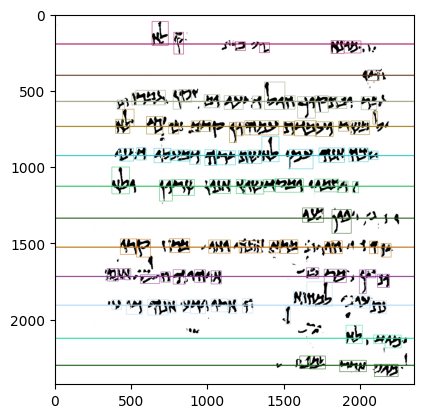

image-data/P344-Fg001-R-C01-R01-binarized.jpg


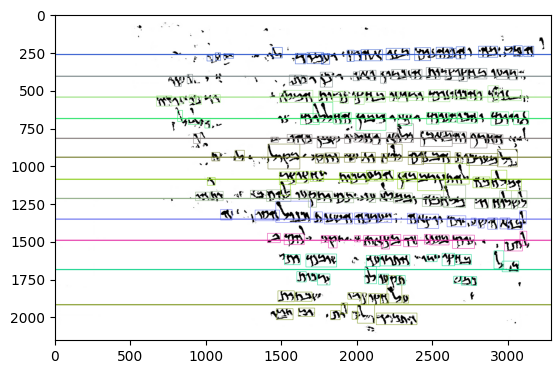

image-data/P423-1-Fg002-R-C01-R01-binarized.jpg


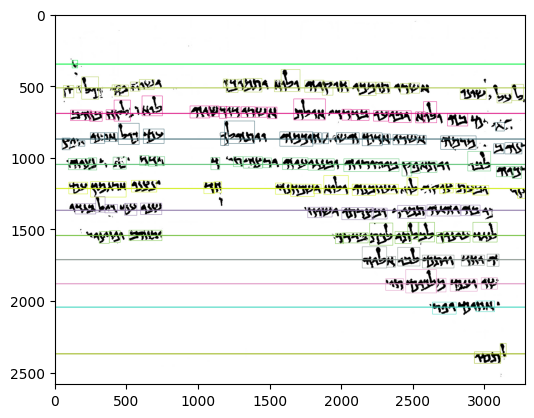

image-data/P423-1-Fg002-R-C02-R01-binarized.jpg


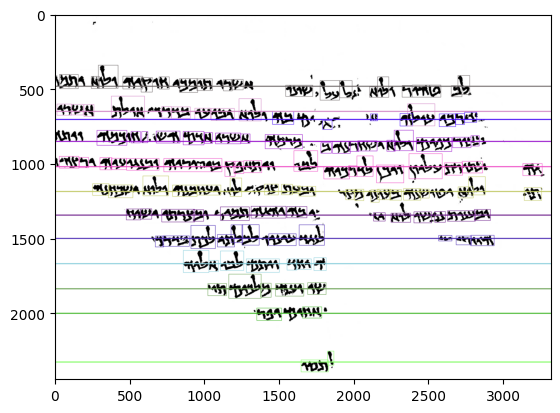

image-data/P513-Fg001-R-C01-R01-binarized.jpg


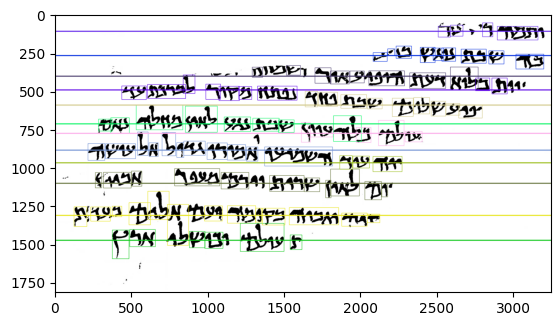

image-data/P564-Fg003-R-C01-R01-binarized.jpg


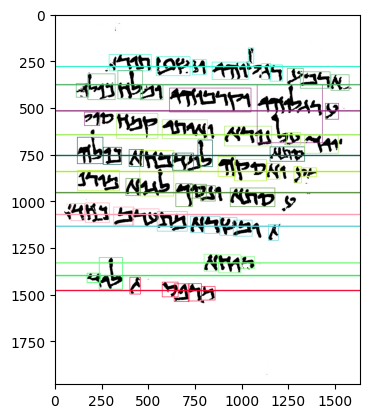

image-data/P583-Fg002-R-C01-R01-binarized.jpg


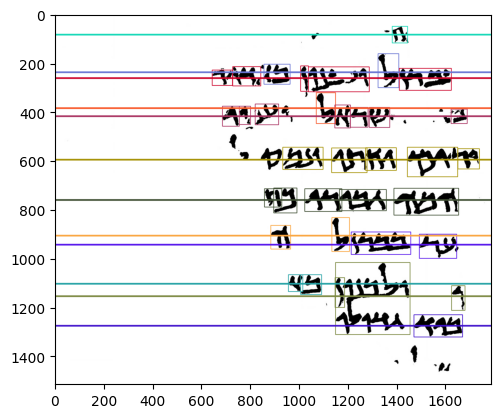

image-data/P583-Fg006-R-C01-R01-binarized.jpg


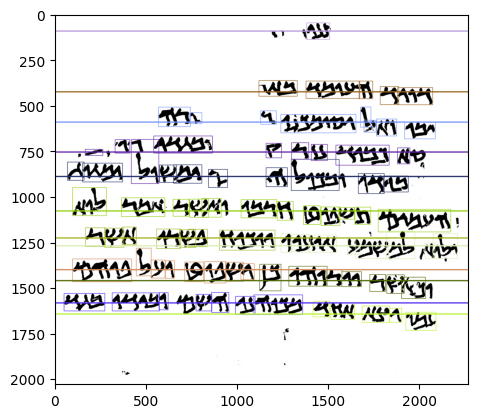

image-data/P632-Fg001-R-C01-R01-binarized.jpg


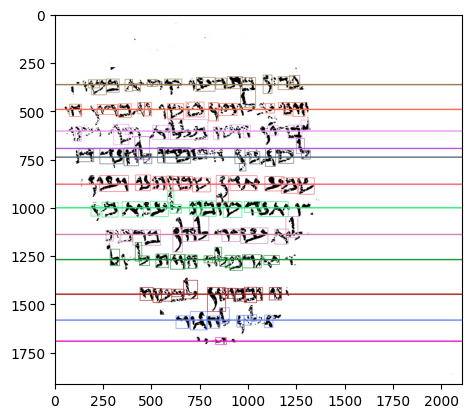

image-data/P632-Fg002-R-C01-R01-binarized.jpg


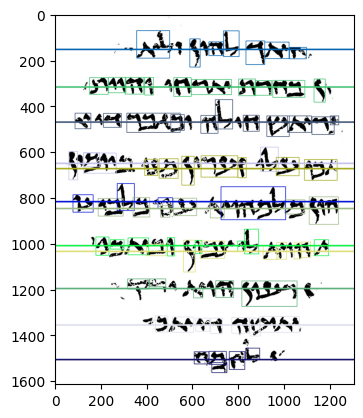

image-data/P846-Fg001-R-C01-R01-binarized.jpg


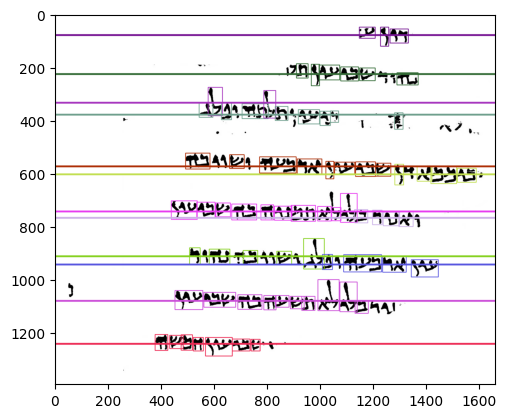

In [32]:
from segment import Segment
import matplotlib.pyplot as plt
import shutil
import os

imagePath2 = "image-data/P106-Fg002-R-C01-R01-binarized.jpg"
sourceFolder = "image-data"
segmentationsFolder = "Data/Segmented/"

if __name__ == "__main__":
    


    for filename in os.listdir(sourceFolder):
        if 'binarized' in filename:
            segmenter = Segment(input_folder=sourceFolder)
            #morph = segmenter.segment_characters()
            imagePath = sourceFolder + "/" + filename
            print(imagePath)

            segmenter.segment_page(path=imagePath)
            img, BOUNDING_BOXES, CENTERS = plotSegmentedBBs(imagePath)
            clusteryBoi(img, CENTERS)

            shutil.rmtree(segmentationsFolder)



In [23]:
import os

if __name__ == "__main__":
    for filename in os.listdir('image-data'):
        if 'binarized' in filename:
            print(filename)
            path = 

P106-Fg002-R-C01-R01-binarized.jpg
P123-Fg001-R-C01-R01-binarized.jpg
P123-Fg002-R-C01-R01-binarized.jpg
P166-Fg002-R-C01-R01-binarized.jpg
P166-Fg007-R-C01-R01-binarized.jpg
P168-Fg016-R-C01-R01-binarized.jpg
P172-Fg001-R-C01-R01-binarized.jpg
P21-Fg006-R-C01-R01-binarized.jpg
P22-Fg008-R-C01-R01-binarized.jpg
P342-Fg001-R-C01-R01-binarized.jpg
P344-Fg001-R-C01-R01-binarized.jpg
P423-1-Fg002-R-C01-R01-binarized.jpg
P423-1-Fg002-R-C02-R01-binarized.jpg
P513-Fg001-R-C01-R01-binarized.jpg
P564-Fg003-R-C01-R01-binarized.jpg
P583-Fg002-R-C01-R01-binarized.jpg
P583-Fg006-R-C01-R01-binarized.jpg
P632-Fg001-R-C01-R01-binarized.jpg
P632-Fg002-R-C01-R01-binarized.jpg
P846-Fg001-R-C01-R01-binarized.jpg


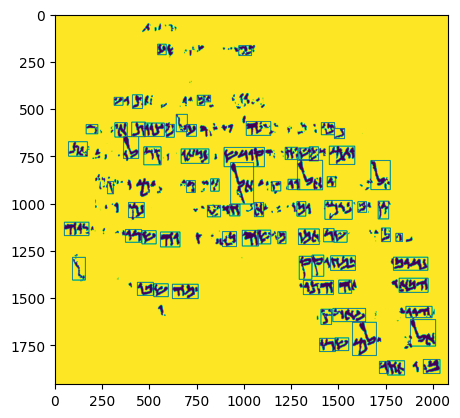

In [16]:
import os
import cv2
import numpy as np

segmentationsFolder = "Data/Segmented/"


def plotSegmentedBBs(imagePath, padding=50):
    img = cv2.imread(imagePath, cv2.IMREAD_GRAYSCALE)

    gray = img.copy() # Read in the image and convert to grayscale
    imHeight, imWidth = gray.shape # get the image dimensions

    gray = 255*(gray < 128).astype(np.uint8) # To invert the text to white
    coords = cv2.findNonZero(gray) # Find all non-zero points (text)
    x, y, w, h = cv2.boundingRect(coords) # Find minimum spanning bounding box

    # pad each side
    y_min = y-padding if y-padding>=0 else 0
    y_max = y+h+padding if y+h+padding<=imHeight else imHeight
    x_min = x-padding if x-padding>=0 else 0
    x_max = x+w+padding if x+w+padding<=imWidth else imWidth

    img = img[y_min:y_max, x_min:x_max] # Crop the image - note we do this on the original image

    top_cut = y_min
    bottom_cut = imHeight - y_max
    left_cut = x_min
    right_cut = imWidth - x_max

    BOUNDING_BOXES = []
    CENTERS = []

    for filename in os.listdir(segmentationsFolder):
        splitName = filename.replace('_', ' ').replace("=", ' ').replace(".", ' ').split()
        x = int(splitName[-8]) - left_cut
        y = int(splitName[-6]) - top_cut
        w = int(splitName[-4])
        h = int(splitName[-2])

        BOUNDING_BOXES.append([x,y,w,h])
        CENTERS.append(y + (h/2)) # get the center point og the BB

        img = cv2.rectangle(img, (x,y), (x+w, y+h), color = (0,0,0), thickness=2)

    return img, BOUNDING_BOXES, CENTERS


plt.imshow(img)
plt.show()

In [25]:
from sklearn.cluster import KMeans
from sklearn import preprocessing as pre


def clusteryBoi(img, CENTERS):

    Y_in = np.array(CENTERS).reshape(-1, 1)
    scaler = pre.MinMaxScaler()
    Y_in = scaler.fit_transform(Y_in)

    k = findOptimalK(Y_in)

    model = KMeans(n_clusters=k)
    preds = model.fit_predict(Y_in)

    COLOURS = np.random.randint(0, 255, [k, 3])



    _, imWidth = img.shape

    img = cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)

    for idx, [x,y,w,h] in enumerate(BOUNDING_BOXES):
        colour = COLOURS[preds[idx]]
        #print(colour)
        colour = (int(colour[0]), int(colour[1]), int(colour[2]))
        #print(colour)
        cv2.rectangle(img, (x,y), (x+w, y+h), color = colour, thickness=2)


    #plt.imshow(img)
    #plt.show()


    lines_img = img.copy()

    centers = scaler.inverse_transform(model.cluster_centers_)

    for idx, cluster_center in enumerate(centers):
        cluster_center = int(cluster_center)

        colour = COLOURS[idx]
        #print(colour)
        colour = (int(colour[0]), int(colour[1]), int(colour[2]))

        cv2.line(lines_img, (0, cluster_center), (imWidth, cluster_center), color = colour, thickness=5)



    plt.imshow(lines_img)
    plt.show()

In [1]:
from sklearn.metrics import silhouette_score

def findOptimalK(data, start=2, end=20):
    inertia = []
    silhouette_scores = []

    for k in range(start,end):
        # make and fit the K-means clustering
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(Y_in)
        
        # calculate inertia
        MSD = kmeans.inertia_
        RMSD = np.sqrt(MSD)
        inertia.append(RMSD)

        # calculate silhouette score
        sil_score = silhouette_score(Y_in, kmeans.labels_)
        silhouette_scores.append(sil_score)

    # the best value for K is the one with the highest silhouette score
    optimal = silhouette_scores.index(max(silhouette_scores))  +  start


    return optimal